### Data Preparation: Handling Missing and Duplicate Data
# Answering Question: Data Preparation - Handle missing and duplicate data from the project document.

In [8]:
import pandas as pd

# Load the dataset
csv_file_path = "data\Solar.csv"  
df = pd.read_csv(csv_file_path, delimiter=",")

# Display basic dataset information
print("Dataset Info:")
df.info()

# Display first few rows
print("\nFirst Few Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_count)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB

First Few Rows:
     Date-Hour(NMT)  WindSpeed  Sunshine  AirPressure  Radiation  \
0  01.01.2017-00:00        0.6         0       1003.8       -7.4   
1  01.01.2017-01:00        1.7         0       1003.5       -7.4   
2  01.01.2017-02:00        0.6         0       1003.4       -6.7   
3  01.01.2017-03:00        

### Seasonal Feature Extraction
# Answering Question: Use date to extract seasonal information (Season, Month, and Day of the month) from the project document.

i encoded the seasons so that the code can use them as numerical values 


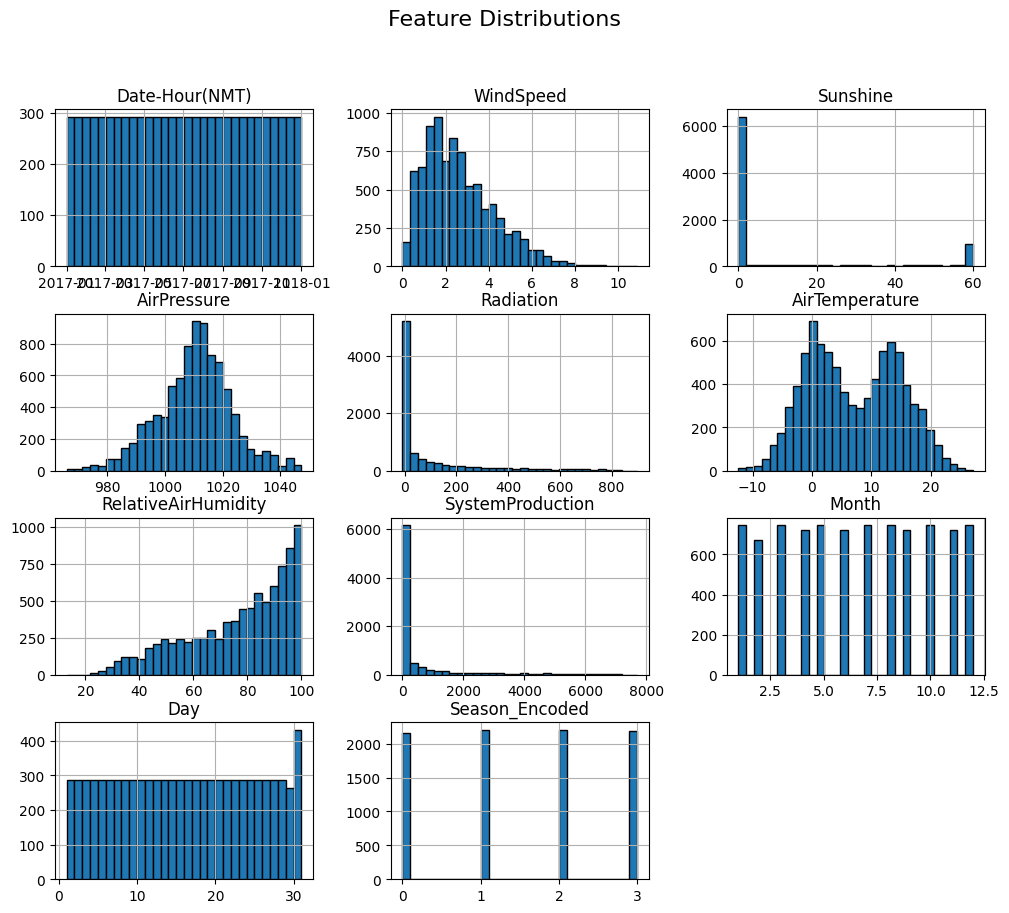

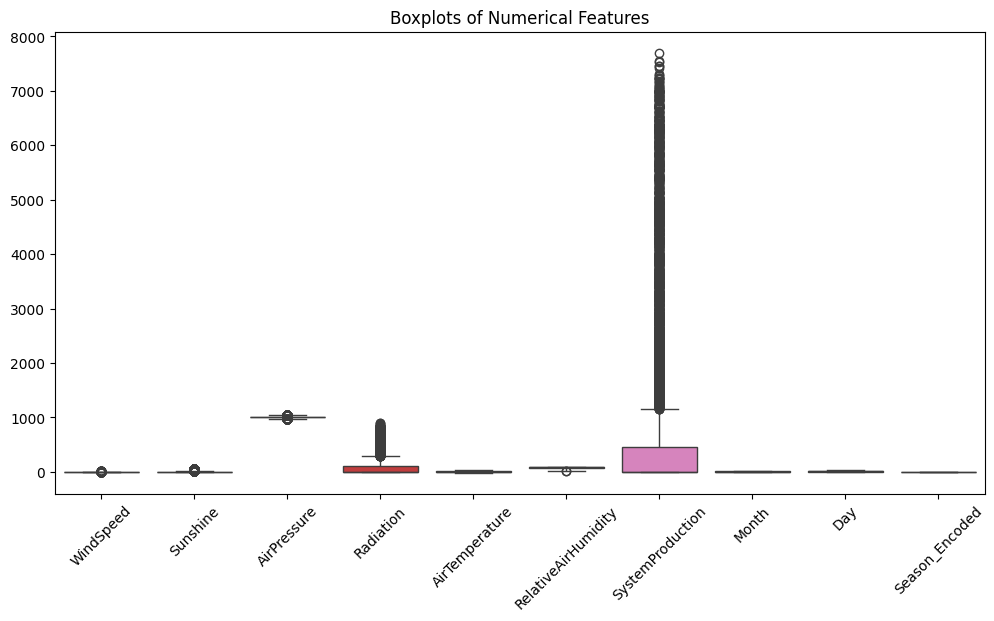

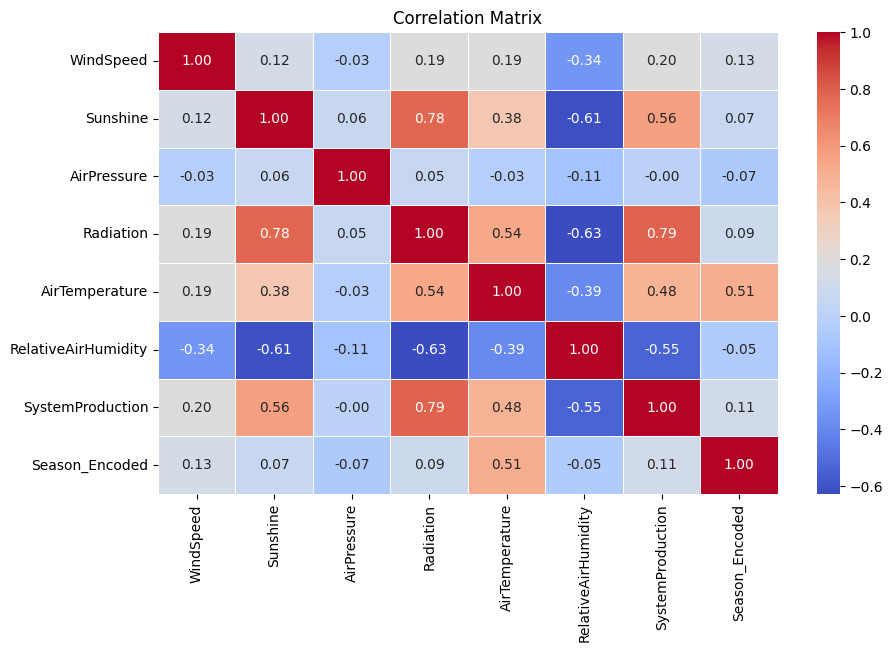


Updated DataFrame with Seasonal Information:
       Date-Hour(NMT)  WindSpeed  Sunshine  AirPressure  Radiation  \
0 2017-01-01 00:00:00        0.6         0       1003.8       -7.4   
1 2017-01-01 01:00:00        1.7         0       1003.5       -7.4   
2 2017-01-01 02:00:00        0.6         0       1003.4       -6.7   
3 2017-01-01 03:00:00        2.4         0       1003.3       -7.2   
4 2017-01-01 04:00:00        4.0         0       1003.1       -6.3   

   AirTemperature  RelativeAirHumidity  SystemProduction  Month  Day  Season  \
0             0.1                   97               0.0      1    1  Winter   
1            -0.2                   98               0.0      1    1  Winter   
2            -1.2                   99               0.0      1    1  Winter   
3            -1.3                   99               0.0      1    1  Winter   
4             3.6                   67               0.0      1    1  Winter   

   Season_Encoded  
0               0  
1           

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
csv_file_path = "data\Solar.csv"  # Updated file path
df = pd.read_csv(csv_file_path, delimiter=",")

# Convert Date-Hour column to datetime format
df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'], format="%d.%m.%Y-%H:%M")

# Extract seasonal information
df['Month'] = df['Date-Hour(NMT)'].dt.month
df['Day'] = df['Date-Hour(NMT)'].dt.day

# Define seasons (Winter: 12,1,2 | Spring: 3,4,5 | Summer: 6,7,8 | Fall: 9,10,11)
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df['Season'] = df['Month'].apply(get_season)

# Encode 'Season' using Ordinal Encoding
season_mapping = {"Winter": 0, "Spring": 1, "Summer": 2, "Fall": 3}
df['Season_Encoded'] = df['Season'].map(season_mapping)

# Exploratory Data Analysis (EDA)
# Histograms for numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['Date-Hour(NMT)', 'Season']))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Features")
plt.show()

# Correlation matrix (including encoded Season and excluding non-numeric columns)
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Display first few rows with new columns
print("\nUpdated DataFrame with Seasonal Information:")
print(df.head())

# Display basic dataset information
print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_count)


## Feature Selection Techniques

Feature selection plays a crucial role in improving model accuracy and efficiency. Two methods were applied:
•	Principal Component Analysis (PCA): Used to reduce dimensionality while preserving variance. The top five principal components were retained, capturing significant information.
•	Chi-Square (Chi2) Test: Evaluated feature importance, with results indicating that sunshine and radiation were the most influential variables affecting system production.


Two robust ML models were implemented:

Random Forest (RF): An ensemble learning method that builds multiple decision trees.

XGBoost (Extreme Gradient Boosting): A decision-tree-based ensemble method optimized for predictive accuracy.

Hyperparameter tuning was performed using Grid Search CV, optimizing:

1----> n_estimators (number of trees)
2----> max_depth (tree depth)
3----> learning_rate (for XGBoost)


Model performance was evaluated using:

Mean Absolute Error (MAE): Measures average absolute prediction error.

R-Square (R²) Score: Assesses model goodness-of-fit.

Root Mean Square Error (RMSE): Evaluates error magnitude.

Normalized RMSE (NRMSE): Compares RMSE to the range of observed data.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Prepare data for ML models
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['SystemProduction'])  # Extract numeric features
X = numeric_features  # Feature set
y = df['SystemProduction']  # Target variable

# Perform PCA for feature reduction
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Perform Chi-Square Test
chi_scores, p_values = chi2(X_scaled, y.astype(int))
chi_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores, 'p-value': p_values})
print("Chi-Square Test Results:")
print(chi_results.sort_values(by='Chi2 Score', ascending=False))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid for tuning
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# Perform Grid Search for Random Forest
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Perform Grid Search for XGBoost
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    nrmse = rmse / (y_test.max() - y_test.min())  # Normalized RMSE
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-Square Score: {r2}")
    print(f"Root Mean Square Error: {rmse}")
    print(f"Normalized RMSE: {nrmse}\n")

# Print evaluation results
evaluate_model(best_rf, X_test, y_test)
evaluate_model(best_xgb, X_test, y_test)



Chi-Square Test Results:
               Feature   Chi2 Score       p-value
1             Sunshine  3593.749635  2.802534e-78
3            Radiation  2350.870682  5.401855e-04
6       Season_Encoded   400.337596  1.000000e+00
4       AirTemperature   290.134641  1.000000e+00
5  RelativeAirHumidity   277.043780  1.000000e+00
0            WindSpeed   196.964855  1.000000e+00
2          AirPressure    60.861298  1.000000e+00
Model: RandomForestRegressor
Mean Absolute Error: 317.6531069275069
R-Square Score: 0.7476087116818654
Root Mean Square Error: 706.6428317191172
Normalized RMSE: 0.09762057727524041

Model: XGBRegressor
Mean Absolute Error: 314.5508720352948
R-Square Score: 0.7514935406456376
Root Mean Square Error: 701.1833878047622
Normalized RMSE: 0.09686637155404945

